###Estudiantes: Valentina Duarte y Ana Maria Arcila

# Problema 1.

Usando el set `PS4_1.csv`, convertir la serie `Date` en el indice (serie de tiempo) y eliminar la serie `Unnamed: 1` (generado por pandas), retornar en una lista y en el siguiente orden:

* cantidad de columnas
* Nombre de las columnas
* número de registros no NaN de cada columna
* cantidad total de memoria usada para cargar el set en el computador ,( df.memory_usage() )
* Estadistica basica para cada columna, media, desviacion estandar, maximo
* Remplazar los NaN por None


# Problema 2

Realizar la lectura del data frame "Crimes_-_2019.csv" asociado a los crimenes que se presentaron en Chicago en el 2019. 


1. Ver la estadistica general del data frame.
2. Dejar las columnas PrimaryType, y Date.
3. Transformar la columna Date que es tipo string en una tipo Fecha, use el siguiente metodo de pandaspd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p").
4. Mostrar los casos totales para cada tipo de crimen de forma ascendente, emplee:
   df.groupby(columna).Date.count()
   
   sort_values()
5. Ordenar los valores por orden alfabetico de Primary type
6. Mostrar de la fila 100 a la 120
6. Realizar una visualización de los datos anteriores.Emplee la libreria  seaborn con un grafico tipo barplot. Ej.
   ax = sns.barplot(x = "contador", y="Primary Type", data = datos)




# Problema 3

1. Leer el dataset country_vaccinations.csv  y filtrar los datos para Colombia
2. Crear un csv con los datos para colombia
3. Realizar una comparacion con los paises latinoamericanos. 
4. A traves de mascaras determinar el numero de vacunados en el intervalo  [1.5E6, 2.0E6]


##Desarrollo Problema 1:

In [ ]:

import pandas as pd
import collections as col

def problema1(path):
    """
    Esta función crea un diccionario con la cantidad de columnas, nombres de las columnas, 
    cantidad de registros no NaN, memoria que ocupan las columnas y estadísticas de las columnas 
    de un DataFrame y el mismo DataFrame pero con los registros NaN cambiados a None.

    Ingresar un archivo de tipo csv que tenga las columnas 'Date', 'Berri1', 'Maisonneuve_1', 
    'Maisonneuve_2' y 'Brebeuf' además de una columna sin nombre.
    """
    df = pd.read_csv(path) #Lectura del archivo csv
    df.drop('Unnamed: 1', axis=1, inplace=True) #Se elimina la columna 'Unnamed: 1' del DataFrame
    del df["Date"] #Se elimina la columna 'Date' del DataFrame
    
    Dic = col.OrderedDict() #Crea un diccionario ordenado con OrderedDict de la librería collections
    Dic['columnas'] = len(df.columns) #Cuenta la cantidad de columnas que quedan en el DataFrame
    Dic['nombres'] = df.columns #Devuelve los labels de cada una de las columnas
    Dic['registros no NaN'] = df.count() #El método count cuenta los datos de cada columna que no sean NaN
    Dic['memoria'] = df.memory_usage() #Muestra la memoria que ocupa cada una de las columnas
    Dic['estadísticas'] = df.describe(include='all') #Estadísticas de cada una de las columnas
    Dic['nan por none'] = df.fillna('None') #Cambia los registros NaN por el string 'None'
    return(Dic)

In [ ]:
problema1('https://docs.google.com/spreadsheets/d/e/2PACX-1vQZV0_FSnQJxdT6Y7hPTSaNK1Zo6ba_JSLyY66xdZbqm60zX6hVWVFtLp0X5Gmf6g/pub?output=csv')

OrderedDict([('columnas', 4),
             ('nombres',
              Index(['Berri1', 'Maisonneuve_1', 'Maisonneuve_2', 'Brebeuf'], dtype='object')),
             ('registros no NaN', Berri1           365
              Maisonneuve_1    365
              Maisonneuve_2    365
              Brebeuf          178
              dtype: int64),
             ('memoria', Index             128
              Berri1           2920
              Maisonneuve_1    2920
              Maisonneuve_2    2920
              Brebeuf          2920
              dtype: int64),
             ('estadísticas',
                          Berri1  Maisonneuve_1  Maisonneuve_2      Brebeuf
              count   365.000000     365.000000     365.000000   178.000000
              mean   2032.200000    1060.252055    2093.169863  2576.359551
              std    1878.879799    1079.533086    1854.368523  2484.004743
              min       0.000000       0.000000       0.000000     0.000000
              25%     194.00000

# Desarrollo Problema 2: 


Primary Type
STALKING                               1
CONCEALED CARRY LICENSE VIOLATION      1
LIQUOR LAW VIOLATION                   2
PROSTITUTION                           2
SEX OFFENSE                            3
ARSON                                  3
OFFENSE INVOLVING CHILDREN             4
PUBLIC PEACE VIOLATION                 4
CRIM SEXUAL ASSAULT                    4
CRIMINAL SEXUAL ASSAULT                5
INTERFERENCE WITH PUBLIC OFFICER       6
CRIMINAL TRESPASS                     20
WEAPONS VIOLATION                     23
ROBBERY                               26
BURGLARY                              28
MOTOR VEHICLE THEFT                   29
NARCOTICS                             37
ASSAULT                               63
OTHER OFFENSE                         65
DECEPTIVE PRACTICE                    84
CRIMINAL DAMAGE                      112
BATTERY                              182
THEFT                                296
Name: Date, dtype: int64
                   

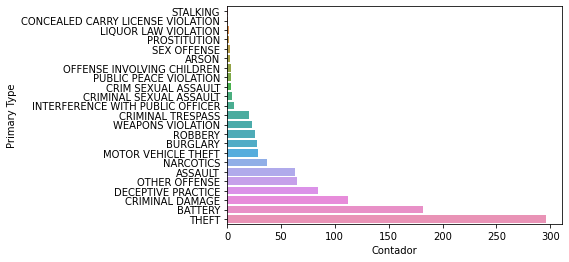

In [ ]:
"""El siguiente código organizará los datos de los crímenes ocurridos en la ciudad de Chicago en el 2019 de manera que se puedan representar por medio de
un gráfico de barras en el que, por cada tipo de crímen, se contará su frecuencia.
"""

import pandas as pd
import seaborn as sns
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSX-fyyVd3VT8n4yeUPcXSghRIZPXGofGL-m62OJzS3PYc5xFn8z2XBrjKX3N5FCxczOmpE9yo2v_m_/pub?output=csv')
#Lee el DataFrame
info_df = df.describe(include='all') #Estadísticas del DataFrame
df.Date=pd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p") #Cambia un string que indica una fecha a un formato de fecha
del df["Unnamed: 0"] #Borra la columna 'Unnamed: 0'
datos_info=df.groupby("Primary Type").Date.count().sort_values(ascending=True) #Casos totales para cada tipo de crimen en forma ascendiente
print(datos_info)
datos_info=datos_info.reset_index() #Nueva secuencia de índices
print(df[100:201])
datos_info=datos_info.rename(columns={"Date":"Contador"}) #Cambia el label de la columna 'Date' por 'Contador'
ax = sns.barplot(x = "Contador", y="Primary Type", data = datos_info) #Gráfico de barras de los datos del DataFrame resultante


#Desarrollo Problema 3:

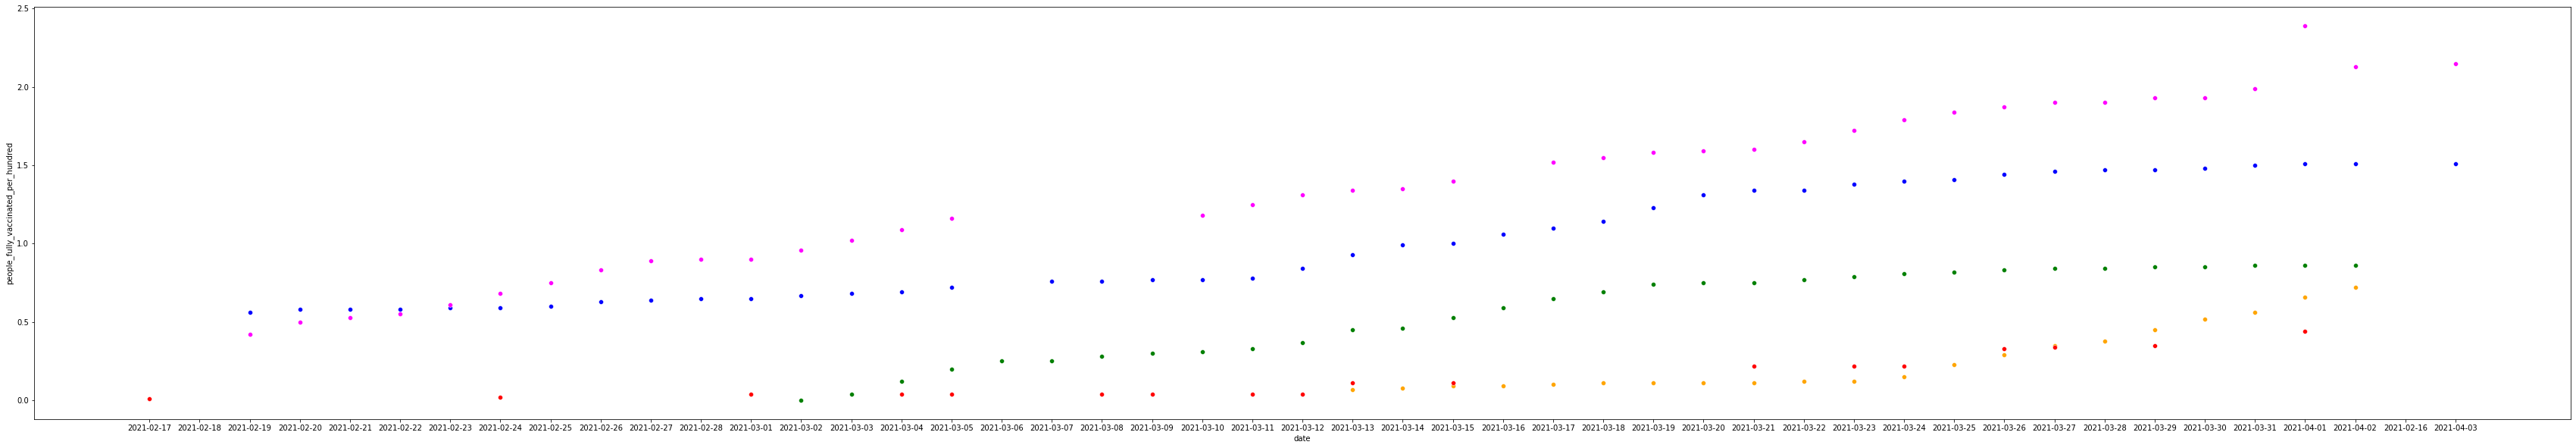

,country,total_vaccinations
361,Argentina,1526078.0
362,Argentina,1546699.0
363,Argentina,1648957.0
364,Argentina,1774438.0
365,Argentina,1919074.0
...,...,...
9527,Wales,1837726.0
9528,Wales,1865120.0
9529,Wales,1893423.0
9530,Wales,1920657.0


In [ ]:
"""El siguiente código leerá los datos de un dataset sobre el progreso de la vacunación contra el virus Covid-19 a nivel mundial. Se aislarán los datos
de Colombia, Ecuador, Argentina, Perú y Brasil y estos se compararán en una gráfica de puntos
"""

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTVM7YnGZYLPgd-H6QRzTXJO568Tcuxb7McuTLSviUoYEu3o92ZCYZqKwYkIP1ROGHqFY-C0zbjSYzp/pub?output=csv')
#Lee el archivo
dfc = df[df['country'] == 'Colombia'] #Aisla los datos de Colombia
dfc.to_csv('datos_colombia.csv',index=False) #Guarda los datos de Colombia como un nuevo DataFrame
plt.figure(figsize=(60,10)) #Cambia el tamaño de la gráfica
dfe = df[df['country'] == 'Ecuador'] #Aisla los datos de Ecuador
dfa = df[df['country'] == 'Argentina'] #Aisla los datos de Argentina
dfp = df[df['country'] == 'Peru'] #Aisla los datos de Perú
dfb = df[df['country'] == 'Brazil'] #Aisla los datos de Brasil
sns.scatterplot(data=dfc, x=dfc.date[0:46], y="people_fully_vaccinated_per_hundred",color='orange') #Grafica los datos de Colombia
sns.scatterplot(data=dfe, x=dfe.date[26:72], y="people_fully_vaccinated_per_hundred",color='red') #Grafica los datos de Ecuador
sns.scatterplot(data=dfa, x=dfa.date[52:97], y="people_fully_vaccinated_per_hundred",color='blue') #Grafica los datos de Argentina
sns.scatterplot(data=dfp, x=dfp.date[8:54], y="people_fully_vaccinated_per_hundred",color='green') #Grafica los datos de Perú
sns.scatterplot(data=dfb, x=dfb.date[34:79], y="people_fully_vaccinated_per_hundred",color='magenta') #Grafica los datos de Brasil
plt.show()

"""Máscara que selecciona las filas en las que la columna 
'total_vaccinations' se encuentra en el intervalo [1.5E6,2.0E6]"""
mask = df[(df['total_vaccinations'] >= 1.5E6) & (df['total_vaccinations'] <= 2.0E6)] 
mask[['country','total_vaccinations']] #Dentro de la máscara, se muestran las columnas 'country' y 'total_vaccinations'